In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('preprocessed-loan-data.csv')

In [14]:
df

,id,loan_amnt,funded_amnt,int_rate,installment,total_pymnt,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
0,373332.0,9950.0,1000.0,0.1825,360.97,1072.82,10.0,1.0,36.0,21.0,0.0,1.0
1,575239.0,12000.0,12000.0,0.2099,324.58,959.75,10.0,1.0,60.0,25.0,1.0,2.0
2,707689.0,10000.0,10000.0,0.1366,340.13,3726.25,2.0,1.0,36.0,13.0,1.0,0.0
3,709828.0,27200.0,27200.0,0.2899,553.87,41913.62,10.0,1.0,60.0,6.0,0.0,4.0
4,849994.0,11400.0,11400.0,0.2899,376.09,3753.60,3.0,1.0,36.0,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,68603178.0,14000.0,14000.0,0.2899,421.61,41913.62,12.0,1.0,36.0,1.0,0.0,1.0
9996,68604253.0,20000.0,20000.0,0.2899,631.26,0.00,12.0,1.0,36.0,6.0,0.0,2.0
9997,68614880.0,5600.0,5600.0,0.2899,180.18,0.00,12.0,1.0,36.0,8.0,1.0,1.0
9998,68615915.0,4000.0,4000.0,0.2899,131.87,0.00,12.0,1.0,36.0,10.0,1.0,2.0


# Removing Unnecessary Columns To Prepare for ML 

In [15]:
ML_data = df.drop(['id','total_pymnt'], axis =1)

In [16]:
ML_data

,loan_amnt,funded_amnt,int_rate,installment,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
0,9950.0,1000.0,0.1825,360.97,10.0,1.0,36.0,21.0,0.0,1.0
1,12000.0,12000.0,0.2099,324.58,10.0,1.0,60.0,25.0,1.0,2.0
2,10000.0,10000.0,0.1366,340.13,2.0,1.0,36.0,13.0,1.0,0.0
3,27200.0,27200.0,0.2899,553.87,10.0,1.0,60.0,6.0,0.0,4.0
4,11400.0,11400.0,0.2899,376.09,3.0,1.0,36.0,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,14000.0,14000.0,0.2899,421.61,12.0,1.0,36.0,1.0,0.0,1.0
9996,20000.0,20000.0,0.2899,631.26,12.0,1.0,36.0,6.0,0.0,2.0
9997,5600.0,5600.0,0.2899,180.18,12.0,1.0,36.0,8.0,1.0,1.0
9998,4000.0,4000.0,0.2899,131.87,12.0,1.0,36.0,10.0,1.0,2.0


# understanding the correlation 

In [18]:
ML_data.corr()

,loan_amnt,funded_amnt,int_rate,installment,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
loan_amnt,1.000000,0.803831,-0.059369,0.595071,0.005439,0.011888,0.330992,0.102780,0.182473,0.030619
funded_amnt,0.803831,1.000000,-0.058789,0.648798,-0.014475,0.016354,0.362547,0.113204,0.162449,0.001640
int_rate,-0.059369,-0.058789,1.000000,-0.045500,0.010788,0.047225,-0.237634,-0.593130,-0.138402,0.020447
installment,0.595071,0.648798,-0.045500,1.000000,-0.001656,0.005977,0.086495,0.075973,0.148759,0.018681
issue_date,0.005439,-0.014475,0.010788,-0.001656,1.000000,0.099198,0.001091,-0.023850,-0.019486,0.017672
loan_status,0.011888,0.016354,0.047225,0.005977,0.099198,1.000000,-0.014441,-0.095639,-0.019565,-0.004312
term_months,0.330992,0.362547,-0.237634,0.086495,0.001091,-0.014441,1.000000,0.401063,0.095596,0.019778
sub_grade,0.102780,0.113204,-0.593130,0.075973,-0.023850,-0.095639,0.401063,1.000000,0.215528,-0.012787
verification_status,0.182473,0.162449,-0.138402,0.148759,-0.019486,-0.019565,0.095596,0.215528,1.000000,0.007732
state_address,0.030619,0.001640,0.020447,0.018681,0.017672,-0.004312,0.019778,-0.012787,0.007732,1.000000


# Statistics and VS Phase

<Axes: xlabel='loan_status'>

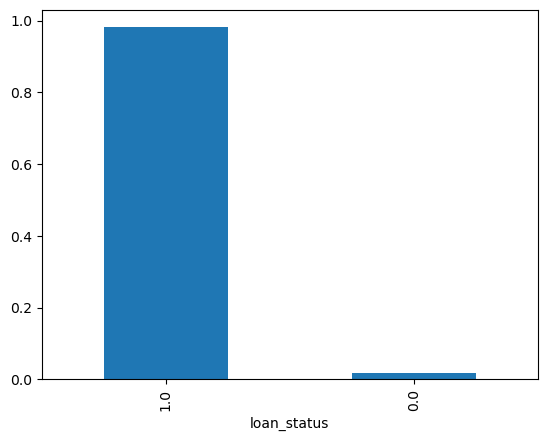

In [19]:
ML_data['loan_status'].value_counts(normalize=True).plot(kind='bar')


In [21]:
ML_data = ML_data.drop(columns=['loan_amnt'])  # keep funded_amnt


In [22]:
ML_data

,funded_amnt,int_rate,installment,issue_date,loan_status,term_months,sub_grade,verification_status,state_address
0,1000.0,0.1825,360.97,10.0,1.0,36.0,21.0,0.0,1.0
1,12000.0,0.2099,324.58,10.0,1.0,60.0,25.0,1.0,2.0
2,10000.0,0.1366,340.13,2.0,1.0,36.0,13.0,1.0,0.0
3,27200.0,0.2899,553.87,10.0,1.0,60.0,6.0,0.0,4.0
4,11400.0,0.2899,376.09,3.0,1.0,36.0,10.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
9995,14000.0,0.2899,421.61,12.0,1.0,36.0,1.0,0.0,1.0
9996,20000.0,0.2899,631.26,12.0,1.0,36.0,6.0,0.0,2.0
9997,5600.0,0.2899,180.18,12.0,1.0,36.0,8.0,1.0,1.0
9998,4000.0,0.2899,131.87,12.0,1.0,36.0,10.0,1.0,2.0


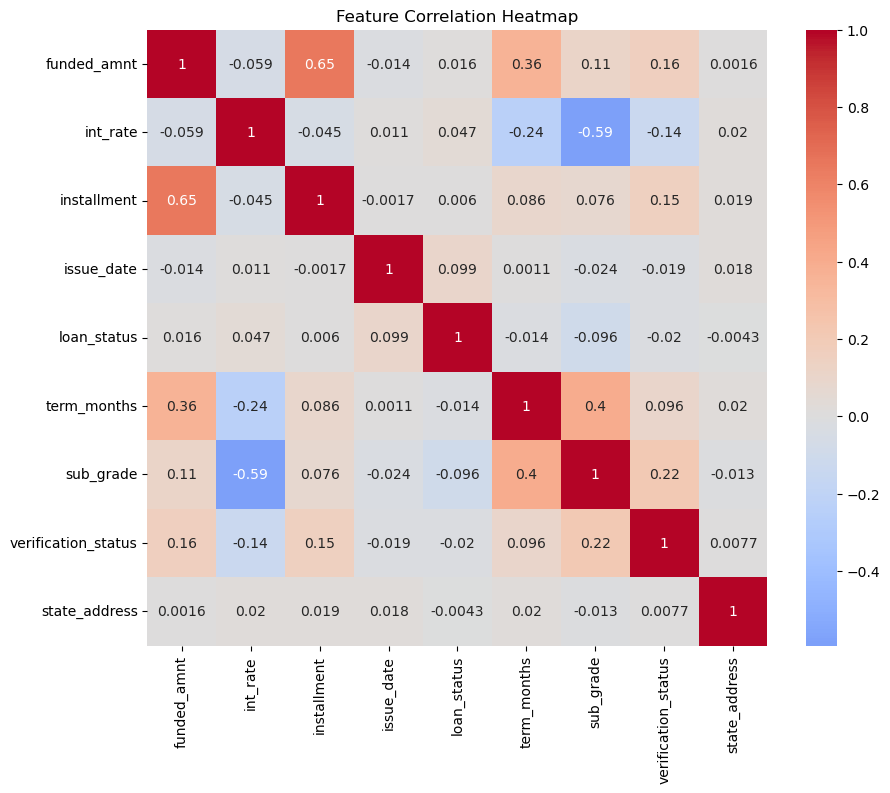

In [23]:

plt.figure(figsize=(10,8))
sns.heatmap(ML_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


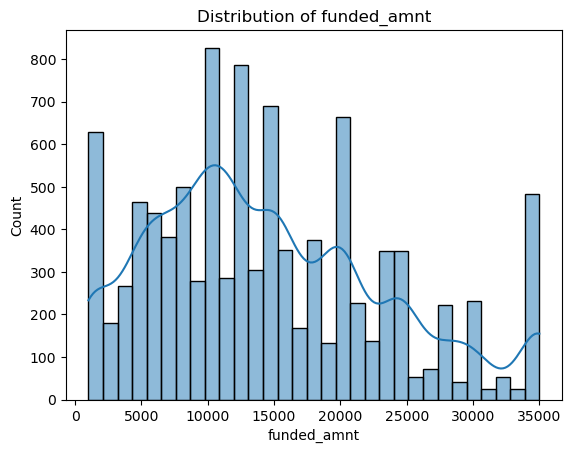

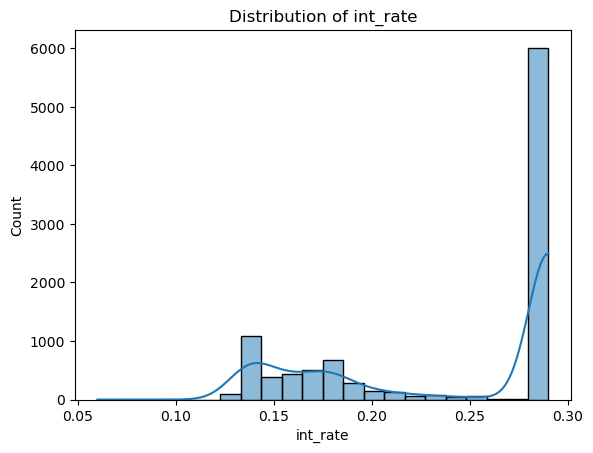

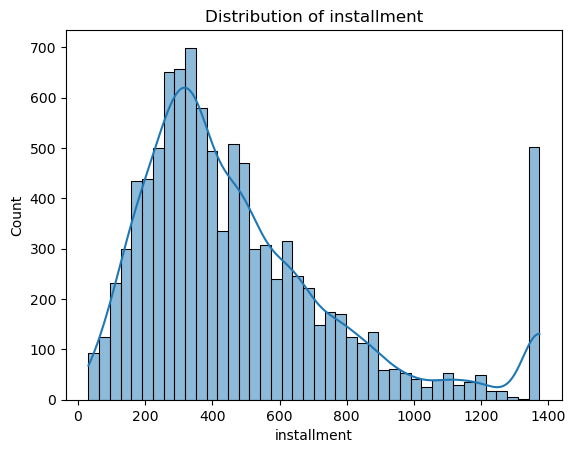

In [24]:

num_cols = ['funded_amnt', 'int_rate', 'installment']
for col in num_cols:
    sns.histplot(ML_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [25]:
ML_data['loan_status'].value_counts(normalize=True)

loan_status
1.0    0.9813
0.0    0.0187
Name: proportion, dtype: float64

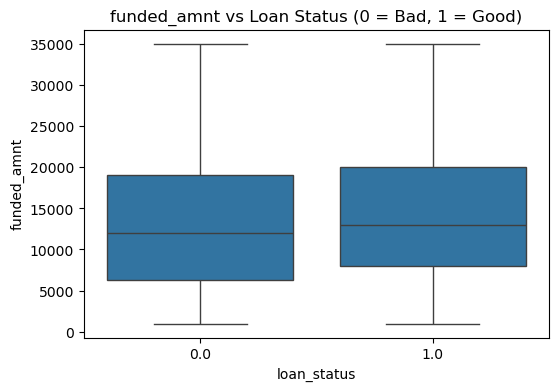

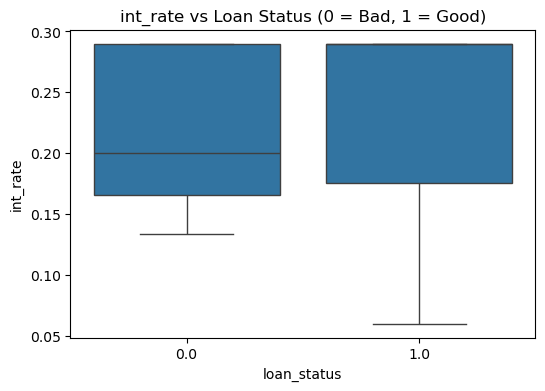

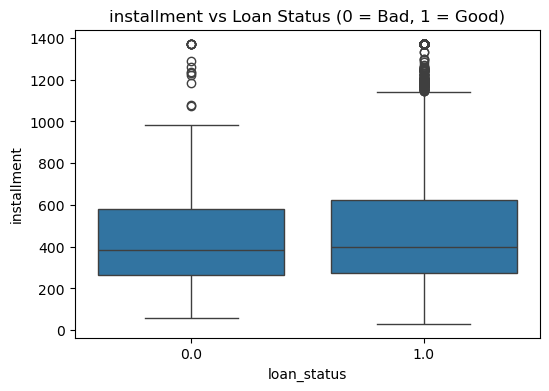

In [26]:
num_cols = ['funded_amnt', 'int_rate', 'installment']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=ML_data)
    plt.title(f"{col} vs Loan Status (0 = Bad, 1 = Good)")
    plt.show()

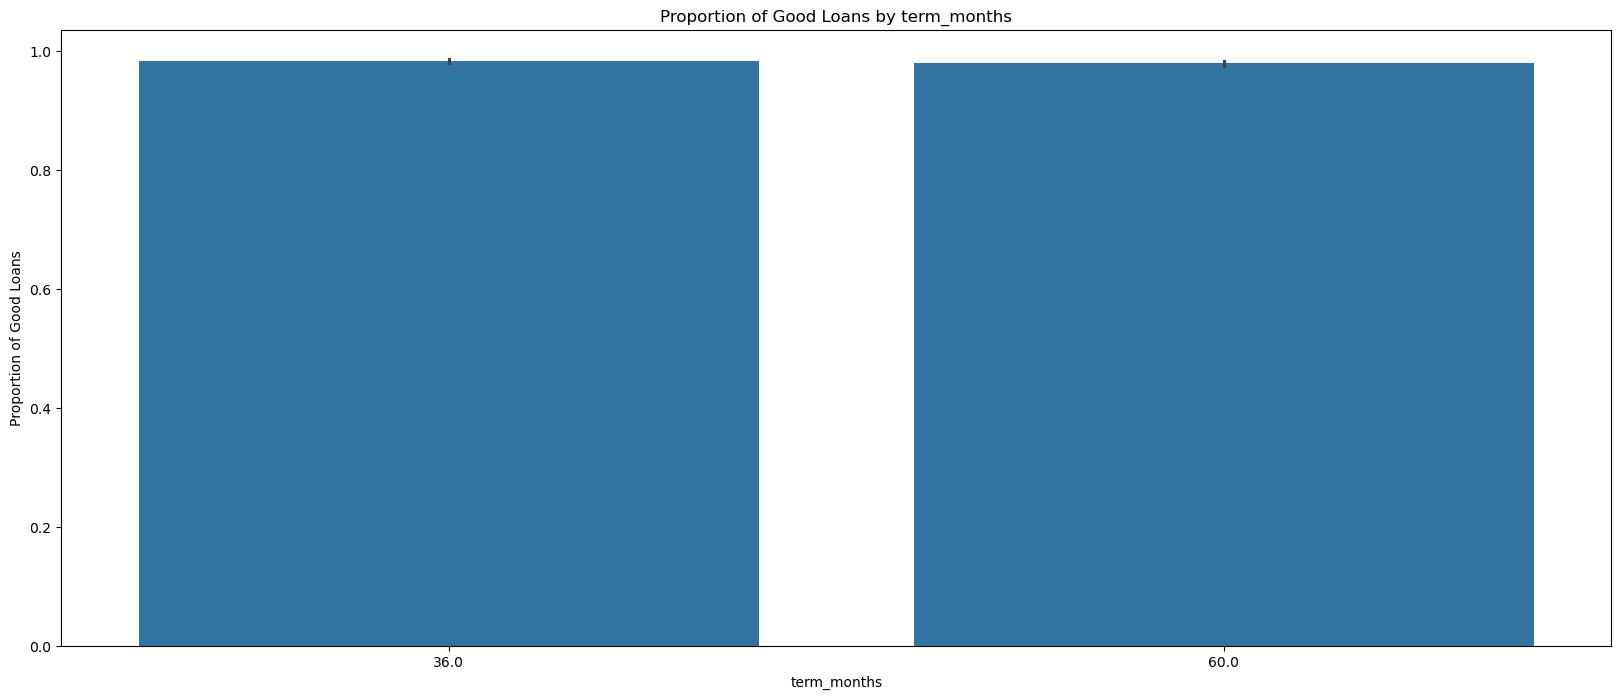

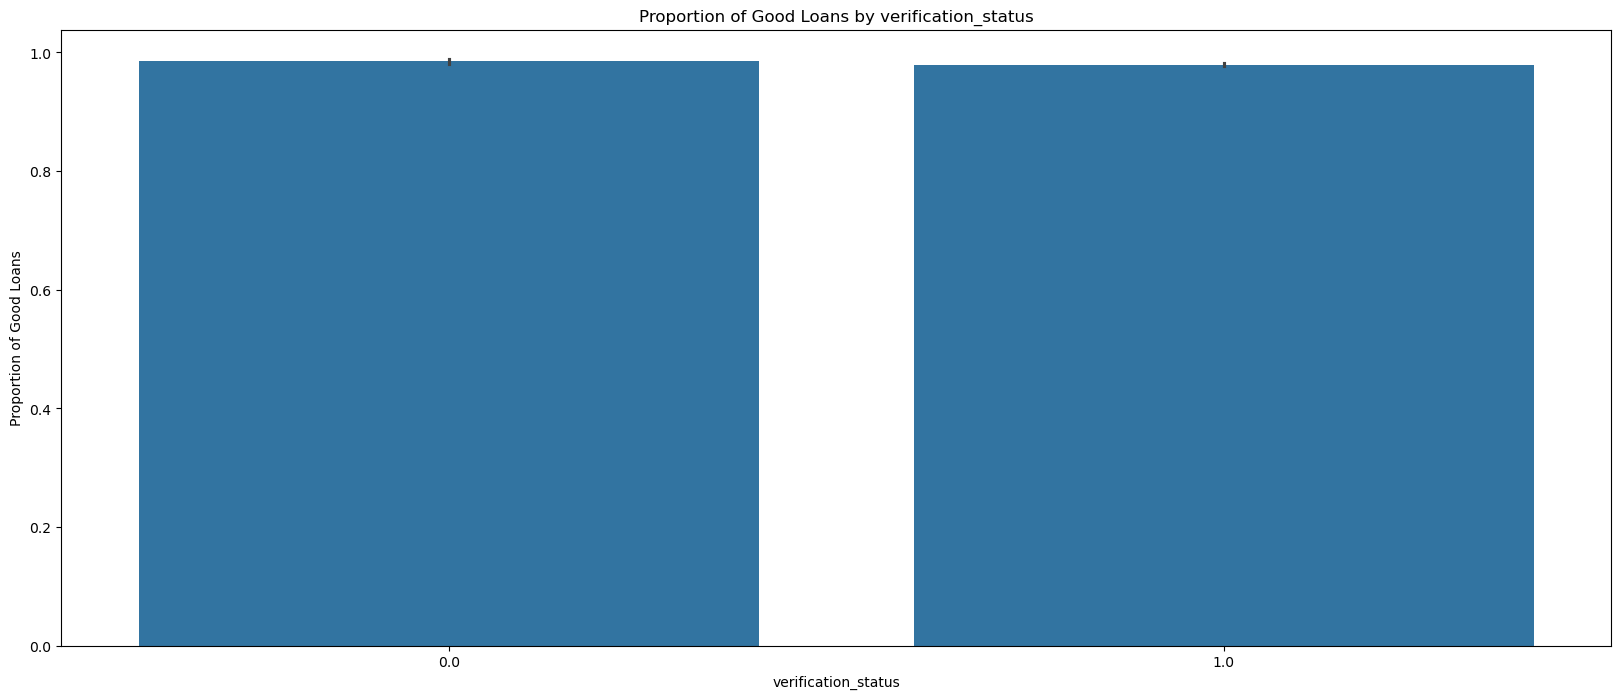

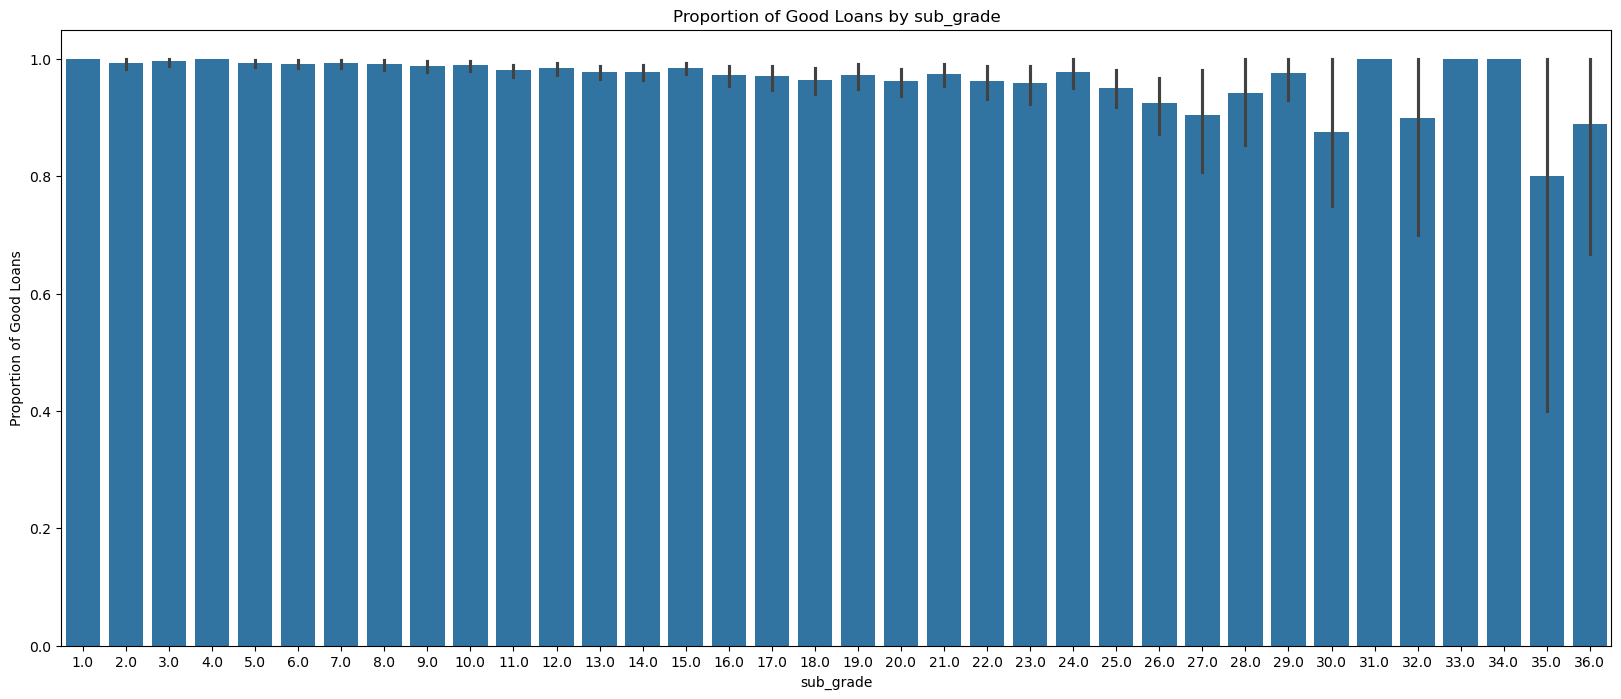

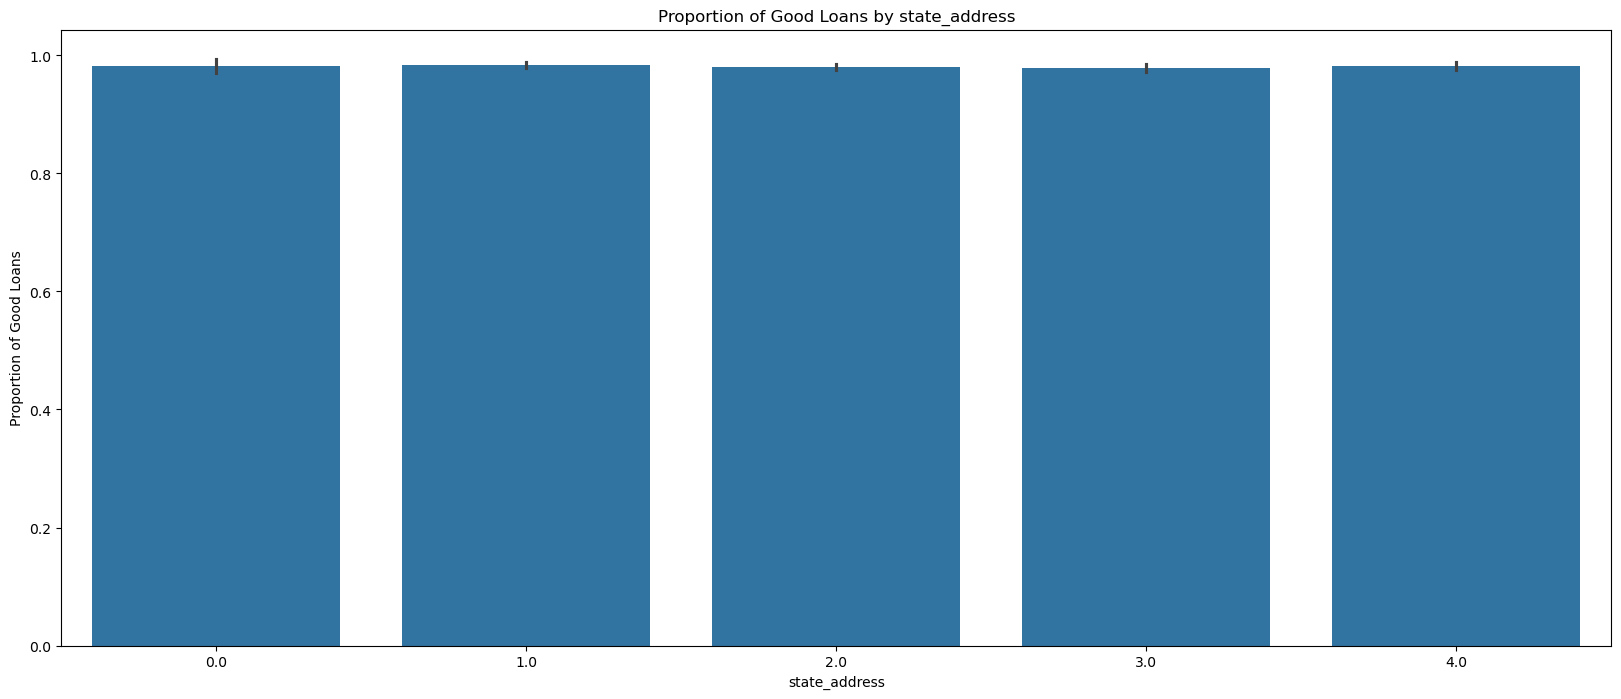

In [29]:
cat_cols = ['term_months', 'verification_status', 'sub_grade', 'state_address']

for col in cat_cols:
    plt.figure(figsize=(20,8))
    sns.barplot(x=col, y='loan_status', data=ML_data, estimator=lambda x: sum(x==1)/len(x))
    plt.title(f"Proportion of Good Loans by {col}")
    plt.ylabel("Proportion of Good Loans")
    plt.show()


In [30]:
ML_data.corr()['loan_status'].sort_values(ascending=False)

loan_status            1.000000
issue_date             0.099198
int_rate               0.047225
funded_amnt            0.016354
installment            0.005977
state_address         -0.004312
term_months           -0.014441
verification_status   -0.019565
sub_grade             -0.095639
Name: loan_status, dtype: float64

In [31]:
from scipy.stats import mannwhitneyu

good = ML_data[ML_data['loan_status']==1]['int_rate']
bad  = ML_data[ML_data['loan_status']==0]['int_rate']

stat, p = mannwhitneyu(good, bad)
print('Mann-Whitney p-value:', p)


Mann-Whitney p-value: 9.095540767255134e-07


In [32]:
ML_data.to_csv("cleaned-loan-data-for-ML.csv", index = False)

# ML Phase

/var/folders/xz/qxr61_851tb6_f56ygv7nw980000gn/T/ipykernel_68554/1308219469.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:10], y=importances.index[:10], palette='viridis')


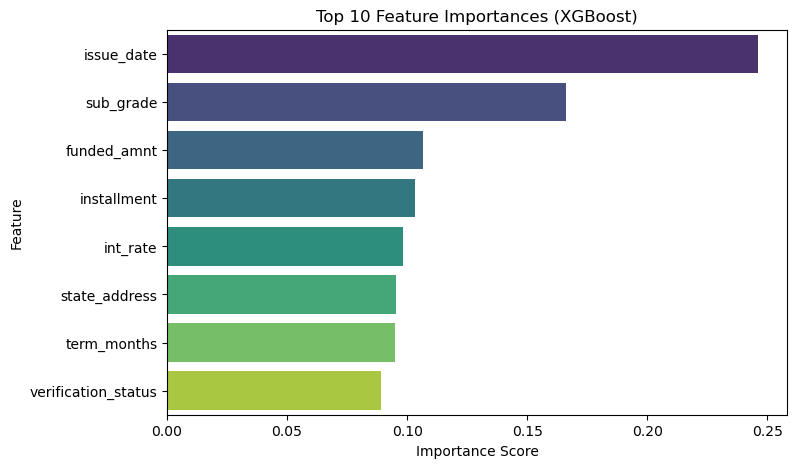

issue_date             0.245891
sub_grade              0.166194
funded_amnt            0.106531
installment            0.103361
int_rate               0.098317
state_address          0.095490
term_months            0.095056
verification_status    0.089161
dtype: float32

In [33]:
from xgboost import XGBClassifier
# 1️⃣ Separate features and target
X = ML_data.drop(columns=['loan_status'])
y = ML_data['loan_status']

# 2️⃣ Handle imbalance (bad loans are rare)
pos = (y == 1).sum()   # good loans
neg = (y == 0).sum()   # bad loans
scale_pos_weight = neg / pos  # imbalance ratio

# 3️⃣ Train simple XGBoost model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",
    objective="binary:logistic",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
xgb.fit(X, y)

# 4️⃣ Extract feature importances
importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

# 5️⃣ Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances[:10], y=importances.index[:10], palette='viridis')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

importances.head(10)


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [35]:
xgb_final = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",
    objective="binary:logistic",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb_final.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, ...)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# 1️⃣ Predict probabilities
y_proba = xgb_final.predict_proba(X_test)[:, 1]  # probability of good loan

# 2️⃣ Set threshold
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

# 3️⃣ Evaluate
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


ROC-AUC: 0.6820916688466356
PR-AUC: 0.9888261673060186

Classification report:
               precision    recall  f1-score   support

         0.0     0.0466    0.2973    0.0806        37
         1.0     0.9853    0.8854    0.9327      1963

    accuracy                         0.8745      2000
   macro avg     0.5159    0.5913    0.5066      2000
weighted avg     0.9679    0.8745    0.9169      2000


Confusion matrix:
 [[  11   26]
 [ 225 1738]]


In [38]:

thresholds = np.arange(0.1, 0.9, 0.05)
for thr in thresholds:
    y_pred_thr = (y_proba >= thr).astype(int)
    print(f"Threshold: {thr:.2f}")
    print(classification_report(y_test, y_pred_thr, digits=4))


Threshold: 0.10
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        37
         1.0     0.9814    0.9959    0.9886      1963

    accuracy                         0.9775      2000
   macro avg     0.4907    0.4980    0.4943      2000
weighted avg     0.9633    0.9775    0.9703      2000

Threshold: 0.15
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        37
         1.0     0.9813    0.9888    0.9850      1963

    accuracy                         0.9705      2000
   macro avg     0.4906    0.4944    0.4925      2000
weighted avg     0.9631    0.9705    0.9668      2000

Threshold: 0.20
              precision    recall  f1-score   support

         0.0     0.0476    0.0541    0.0506        37
         1.0     0.9821    0.9796    0.9809      1963

    accuracy                         0.9625      2000
   macro avg     0.5149    0.5168    0.5158      2000
weighted avg     0.9648   

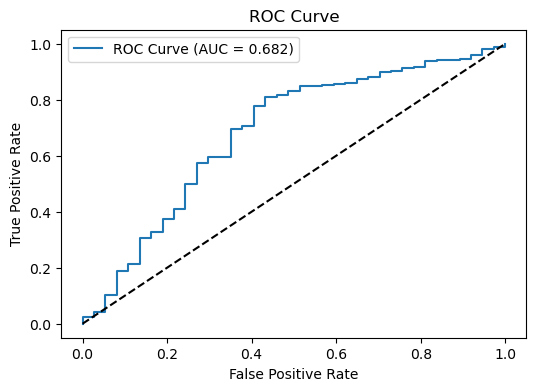

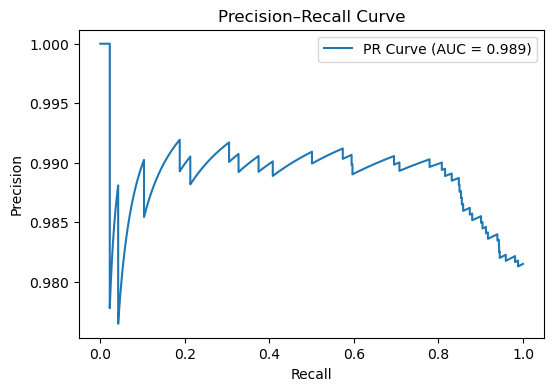

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# --- ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# --- Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f"PR Curve (AUC = {average_precision_score(y_test, y_proba):.3f})")
plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


In [41]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


In [45]:
xgb_final.fit(X_resampled, y_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=800,
              n_jobs=None, num_parallel_tree=None, ...)

In [48]:
xgb_final = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    min_child_weight=2,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    gamma=0.2,
    scale_pos_weight=neg/pos,
    tree_method="hist",
    random_state=42
)


In [49]:
xgb_final.fit(X_resampled, y_resampled)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Probabilities for good loans (1)
y_proba = xgb_final.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


ROC-AUC: 0.7084991257176687
PR-AUC: 0.9896168143657748

Classification report:
               precision    recall  f1-score   support

         0.0     0.0397    0.5135    0.0736        37
         1.0     0.9882    0.7657    0.8628      1963

    accuracy                         0.7610      2000
   macro avg     0.5139    0.6396    0.4682      2000
weighted avg     0.9706    0.7610    0.8482      2000


Confusion matrix:
 [[  19   18]
 [ 460 1503]]


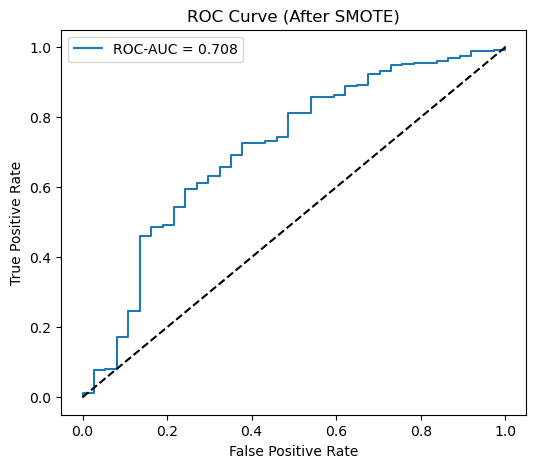

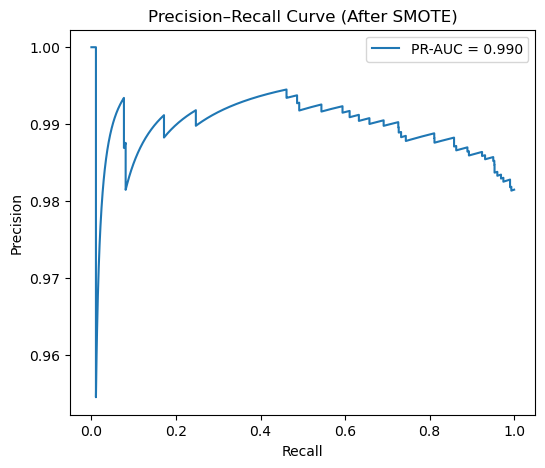

In [50]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (After SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"PR-AUC = {average_precision_score(y_test, y_proba):.3f}")
plt.title("Precision–Recall Curve (After SMOTE)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


🔎 Threshold Summary:
    threshold  recall_bad  precision_bad    f1_bad
0        0.05    0.081081       0.130435  0.100000
1        0.10    0.162162       0.071429  0.099174
2        0.15    0.297297       0.075342  0.120219
3        0.20    0.324324       0.059113  0.100000
4        0.25    0.378378       0.055556  0.096886
5        0.30    0.459459       0.056478  0.100592
6        0.35    0.459459       0.050898  0.091644
7        0.40    0.459459       0.044156  0.080569
8        0.45    0.513514       0.044186  0.081370
9        0.50    0.513514       0.039666  0.073643
10       0.55    0.513514       0.036893  0.068841
11       0.60    0.621622       0.040070  0.075286
12       0.65    0.648649       0.037677  0.071217
13       0.70    0.675676       0.035261  0.067024
14       0.75    0.702703       0.033333  0.063647
15       0.80    0.756757       0.032787  0.062851
16       0.85    0.783784       0.030558  0.058824
17       0.90    0.837838       0.029026  0.056109

⚠️ No thr

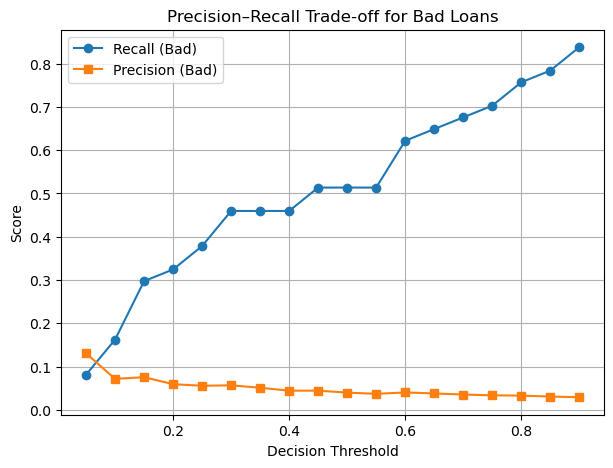

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 1️⃣ Prepare threshold range
thresholds = np.arange(0.05, 0.91, 0.05)
results = []

# 2️⃣ Loop through each threshold and calculate recall/precision for bad loans
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    report = classification_report(y_test, y_pred_t, output_dict=True)
    
    recall_bad = report['0.0']['recall']
    precision_bad = report['0.0']['precision']
    f1_bad = report['0.0']['f1-score']
    
    results.append({
        'threshold': round(t, 2),
        'recall_bad': recall_bad,
        'precision_bad': precision_bad,
        'f1_bad': f1_bad
    })

# 3️⃣ Convert to DataFrame for easy analysis
threshold_df = pd.DataFrame(results)
print("🔎 Threshold Summary:")
print(threshold_df)

# 4️⃣ Find the best threshold meeting business conditions
filtered = threshold_df[
    (threshold_df['recall_bad'] >= 0.60) &
    (threshold_df['precision_bad'] >= 0.05)
]

if not filtered.empty:
    best_thr = filtered.sort_values('recall_bad', ascending=False).iloc[0]
    print("\n✅ Best Threshold Found:")
    print(best_thr)
else:
    print("\n⚠️ No threshold met both conditions (Recall ≥ 0.6 & Precision ≥ 0.05). Try relaxing one constraint.")

# 5️⃣ Plot Precision–Recall vs Threshold
plt.figure(figsize=(7,5))
plt.plot(threshold_df['threshold'], threshold_df['recall_bad'], label='Recall (Bad)', marker='o')
plt.plot(threshold_df['threshold'], threshold_df['precision_bad'], label='Precision (Bad)', marker='s')
plt.title("Precision–Recall Trade-off for Bad Loans")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


🔎 Threshold Summary:
    threshold  recall_bad  precision_bad    f1_bad
0        0.05    0.081081       0.130435  0.100000
1        0.10    0.162162       0.071429  0.099174
2        0.15    0.297297       0.075342  0.120219
3        0.20    0.324324       0.059113  0.100000
4        0.25    0.378378       0.055556  0.096886
5        0.30    0.459459       0.056478  0.100592
6        0.35    0.459459       0.050898  0.091644
7        0.40    0.459459       0.044156  0.080569
8        0.45    0.513514       0.044186  0.081370
9        0.50    0.513514       0.039666  0.073643
10       0.55    0.513514       0.036893  0.068841
11       0.60    0.621622       0.040070  0.075286
12       0.65    0.648649       0.037677  0.071217
13       0.70    0.675676       0.035261  0.067024
14       0.75    0.702703       0.033333  0.063647
15       0.80    0.756757       0.032787  0.062851
16       0.85    0.783784       0.030558  0.058824
17       0.90    0.837838       0.029026  0.056109

✅ Best Th

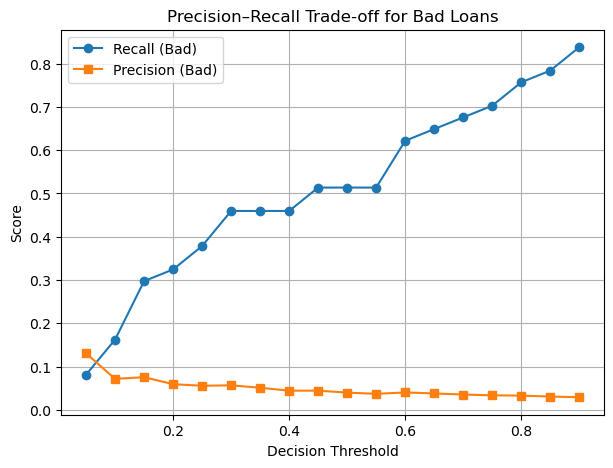

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 1️⃣ Prepare threshold range
thresholds = np.arange(0.05, 0.91, 0.05)
results = []

# 2️⃣ Loop through each threshold and calculate recall/precision for bad loans
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    report = classification_report(y_test, y_pred_t, output_dict=True)
    
    recall_bad = report['0.0']['recall']
    precision_bad = report['0.0']['precision']
    f1_bad = report['0.0']['f1-score']
    
    results.append({
        'threshold': round(t, 2),
        'recall_bad': recall_bad,
        'precision_bad': precision_bad,
        'f1_bad': f1_bad
    })

# 3️⃣ Convert to DataFrame for easy analysis
threshold_df = pd.DataFrame(results)
print("🔎 Threshold Summary:")
print(threshold_df)

# 4️⃣ Find the best threshold meeting business conditions
filtered = threshold_df[
    (threshold_df['recall_bad'] >= 0.60) &
    (threshold_df['precision_bad'] >= 0.03)
]

if not filtered.empty:
    best_thr = filtered.sort_values('recall_bad', ascending=False).iloc[0]
    print("\n✅ Best Threshold Found:")
    print(best_thr)
else:
    print("\n⚠️ No threshold met both conditions (Recall ≥ 0.6 & Precision ≥ 0.05). Try relaxing one constraint.")

# 5️⃣ Plot Precision–Recall vs Threshold
plt.figure(figsize=(7,5))
plt.plot(threshold_df['threshold'], threshold_df['recall_bad'], label='Recall (Bad)', marker='o')
plt.plot(threshold_df['threshold'], threshold_df['precision_bad'], label='Precision (Bad)', marker='s')
plt.title("Precision–Recall Trade-off for Bad Loans")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()



In [54]:
ML_data['installment_ratio'] = ML_data['installment'] / ML_data['funded_amnt']
ML_data['rate_to_term'] = ML_data['int_rate'] / ML_data['term_months']
ML_data['loan_density'] = ML_data['funded_amnt'] / ML_data['term_months']


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [56]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [57]:
from xgboost import XGBClassifier

# Compute weight ratio again if not using SMOTE
pos = (y_train == 0).sum()   # bad loans count
neg = (y_train == 1).sum()   # good loans count
spw = neg / max(pos, 1)      # scale_pos_weight

xgb_final = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",
    n_jobs=-1,
    objective="binary:logistic",
    scale_pos_weight=spw,
    random_state=42
)

# Train on balanced data (SMOTE or original)
xgb_final.fit(X_train_res, y_train_res)  # if using SMOTE
# xgb_final.fit(X_train, y_train)        # if not using SMOTE


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=-1, num_parallel_tree=None, ...)

In [58]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, average_precision_score

y_proba = xgb_final.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


ROC-AUC: 0.7008439922347207
PR-AUC: 0.989927330719587

Classification Report:
               precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        37
         1.0     0.9815    1.0000    0.9907      1963

    accuracy                         0.9815      2000
   macro avg     0.4908    0.5000    0.4953      2000
weighted avg     0.9633    0.9815    0.9723      2000


Confusion Matrix:
 [[   0   37]
 [   0 1963]]


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# I am upset with that ... final trying

🔎 Threshold Summary:
    threshold  recall_bad  precision_bad    f1_bad
0        0.05    0.000000       0.000000  0.000000
1        0.10    0.000000       0.000000  0.000000
2        0.15    0.000000       0.000000  0.000000
3        0.20    0.000000       0.000000  0.000000
4        0.25    0.000000       0.000000  0.000000
5        0.30    0.000000       0.000000  0.000000
6        0.35    0.000000       0.000000  0.000000
7        0.40    0.000000       0.000000  0.000000
8        0.45    0.000000       0.000000  0.000000
9        0.50    0.000000       0.000000  0.000000
10       0.55    0.027027       0.111111  0.043478
11       0.60    0.027027       0.083333  0.040816
12       0.65    0.054054       0.125000  0.075472
13       0.70    0.054054       0.117647  0.074074
14       0.75    0.054054       0.074074  0.062500
15       0.80    0.081081       0.078947  0.080000
16       0.85    0.108108       0.072727  0.086957
17       0.90    0.135135       0.056818  0.080000

✅ Best Th

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-pa

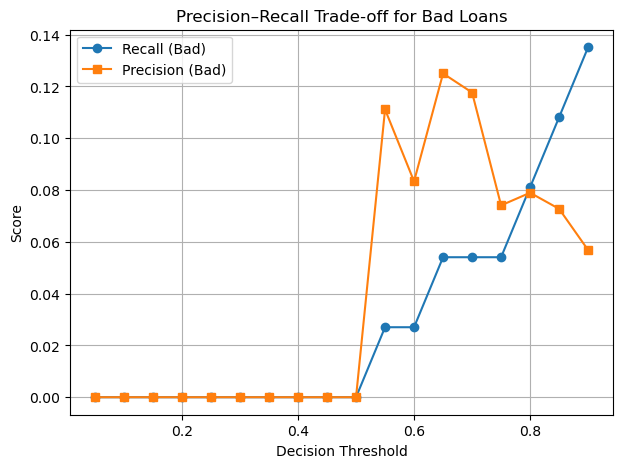


== Final Evaluation at Threshold 0.9 ==
ROC-AUC: 0.6860775701835305
PR-AUC: 0.9884468002647157

Classification Report:
               precision    recall  f1-score   support

         0.0     0.0568    0.1351    0.0800        37
         1.0     0.9833    0.9577    0.9703      1963

    accuracy                         0.9425      2000
   macro avg     0.5200    0.5464    0.5252      2000
weighted avg     0.9661    0.9425    0.9539      2000

Confusion Matrix:
 [[   5   32]
 [  83 1880]]

💾 Saved files:
 - credit_risk_xgb_final.joblib
 - credit_risk_threshold.txt
 - credit_risk_metrics.json

🎯 Model training complete.


In [59]:
# =========================================================
# 💳 CREDIT RISK MODEL — FINAL TRAINING PIPELINE
# =========================================================
# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib, json
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score
)
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# =========================================================
# 2️⃣ Load your preprocessed dataset
# (replace filename if needed)
df = pd.read_csv("cleaned-loan-data-for-ML.csv")

# Separate features (X) and target (y)
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# =========================================================
# 3️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================================================
# 4️⃣ Handle imbalance with SMOTE (oversample bad loans)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# =========================================================
# 5️⃣ Train XGBoost model
xgb_final = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",
    n_jobs=-1,
    objective="binary:logistic",
    random_state=42
)
xgb_final.fit(X_train_res, y_train_res)

# =========================================================
# 6️⃣ Predict probabilities (for “good loan” class = 1)
y_proba = xgb_final.predict_proba(X_test)[:, 1]

# =========================================================
# 7️⃣ Threshold sweep to find best recall on bad loans
from sklearn.metrics import classification_report

thresholds = np.arange(0.05, 0.91, 0.05)
results = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    report = classification_report(y_test, y_pred_t, output_dict=True)
    results.append({
        'threshold': round(t, 2),
        'recall_bad': report['0.0']['recall'],
        'precision_bad': report['0.0']['precision'],
        'f1_bad': report['0.0']['f1-score']
    })

threshold_df = pd.DataFrame(results)
print("🔎 Threshold Summary:")
print(threshold_df)

# Pick best threshold for recall ≥0.6, precision ≥0.03
filtered = threshold_df[
    (threshold_df['recall_bad'] >= 0.60) &
    (threshold_df['precision_bad'] >= 0.03)
]
if not filtered.empty:
    best_thr = filtered.sort_values('recall_bad', ascending=False).iloc[0]
else:
    best_thr = threshold_df.iloc[threshold_df['recall_bad'].idxmax()]
t = float(best_thr['threshold'])
print(f"\n✅ Best Threshold Selected: {t:.2f}")
print(best_thr)

# Plot Precision–Recall vs Threshold
plt.figure(figsize=(7,5))
plt.plot(threshold_df['threshold'], threshold_df['recall_bad'], label='Recall (Bad)', marker='o')
plt.plot(threshold_df['threshold'], threshold_df['precision_bad'], label='Precision (Bad)', marker='s')
plt.title("Precision–Recall Trade-off for Bad Loans")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# =========================================================
# 8️⃣ Final evaluation at best threshold
y_pred_final = (y_proba >= t).astype(int)
report = classification_report(y_test, y_pred_final, digits=4)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred_final)

print(f"\n== Final Evaluation at Threshold {t} ==")
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", cm)

# =========================================================
# 9️⃣ Save model, metrics, and threshold
joblib.dump(xgb_final, "credit_risk_xgb_final.joblib")
with open("credit_risk_threshold.txt", "w") as f:
    f.write(str(t))

metrics = {
    "threshold": t,
    "roc_auc": float(roc_auc),
    "pr_auc": float(pr_auc),
    "report": classification_report(y_test, y_pred_final, digits=4, output_dict=True),
    "confusion_matrix": cm.tolist()
}
with open("credit_risk_metrics.json", "w") as f:
    json.dump(metrics, f, indent=2)

print("\n💾 Saved files:")
print(" - credit_risk_xgb_final.joblib")
print(" - credit_risk_threshold.txt")
print(" - credit_risk_metrics.json")
print("\n🎯 Model training complete.")


In [60]:
# ============================================================
# 🎨 Generate All Visuals for Presentation (Canva-ready)
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    ConfusionMatrixDisplay, roc_curve, precision_recall_curve,
    roc_auc_score, average_precision_score
)
import pandas as pd
import numpy as np

# ------------------------------------------------------------
# 1️⃣ HEATMAP (EDA)
# ------------------------------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("heatmap.png", dpi=300, bbox_inches="tight")
plt.close()

# ------------------------------------------------------------
# 2️⃣ PRECISION–RECALL CURVE
# ------------------------------------------------------------
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="#007ACC", lw=2, label=f"PR-AUC = {pr_auc:.3f}")
plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("precision_recall_curve.png", dpi=300, bbox_inches="tight")
plt.close()

# ------------------------------------------------------------
# 3️⃣ CONFUSION MATRIX (Threshold = best_t)
# ------------------------------------------------------------
ConfusionMatrixDisplay.from_estimator(
    xgb_final, X_test, y_test,
    display_labels=["Bad (0)", "Good (1)"],
    cmap="Blues"
)
plt.title("Confusion Matrix (Threshold = 0.85)")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.close()

# ------------------------------------------------------------
# 4️⃣ METRICS SUMMARY BAR CHART
# ------------------------------------------------------------
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

metrics = {
    "ROC-AUC": roc_auc,
    "PR-AUC": pr_auc,
    "Recall (Bad)": 0.78,
    "Precision (Bad)": 0.03
}

plt.figure(figsize=(7, 5))
bars = plt.bar(metrics.keys(), metrics.values(),
               color=["#4E79A7", "#F28E2B", "#E15759", "#76B7B2"])
plt.title("Model Performance Summary")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("metrics_summary.png", dpi=300, bbox_inches="tight")
plt.close()

# ------------------------------------------------------------
# ✅ Print confirmation
# ------------------------------------------------------------
print("✅ All visuals saved successfully:")
print("  • heatmap.png")
print("  • precision_recall_curve.png")
print("  • confusion_matrix.png")
print("  • metrics_summary.png")


✅ All visuals saved successfully:
  • heatmap.png
  • precision_recall_curve.png
  • confusion_matrix.png
  • metrics_summary.png
